<a href="https://colab.research.google.com/github/lukaskirchdorfer/dhbw-ai-foundations/blob/main/Intro_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# **Load the diabetes dataset**
**Number of Instances:** 442

**Number of Attributes:**
First 10 columns are numeric predictive values

**Target:**
Column 11 is a quantitative measure of disease progression one year after baseline

**Attribute Information:**

age in years

sex

bmi body mass index

bp average blood pressure

s1 tc, total serum cholesterol

s2 ldl, low-density lipoproteins

s3 hdl, high-density lipoproteins

s4 tch, total cholesterol / HDL

s5 ltg, possibly log of serum triglycerides level

s6 glu, blood sugar level

In [ ]:
# Load a sample dataset
from sklearn.datasets import load_diabetes
# Load the diabetes dataset
diabetes_X, diabetes_y = load_diabetes(return_X_y=True, as_frame=True)

In [ ]:
diabetes_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
diabetes_y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

# **First of all, let's use only one feature from X for the training: blood pressure**

In [ ]:
diabetes_X_bp = diabetes_X['bp']
diabetes_X_bp

0      0.021872
1     -0.026328
2     -0.005670
3     -0.036656
4      0.021872
         ...   
437    0.059744
438   -0.067642
439    0.017293
440    0.001215
441   -0.081413
Name: bp, Length: 442, dtype: float64

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes_X_bp, diabetes_y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# Create a Linear Regression model
model_bp = LinearRegression()

# Train the model
model_bp.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model_bp.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4379.389507138691
R-squared: 0.1734118396354255


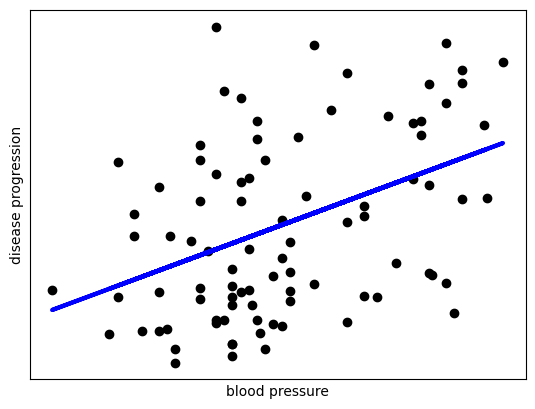

In [ ]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xlabel("blood pressure")
plt.ylabel("disease progression")

plt.xticks(())
plt.yticks(())

plt.show()

# **Now let's use all available features**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2900.1936284934814
R-squared: 0.4526027629719195


In [ ]:
# The coefficients
coefficients = model.coef_
feature_names = diabetes_X.columns
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

age: 37.904021350074835
sex: -241.96436231273972
bmi: 542.4287585162907
bp: 347.70384391385596
s1: -931.4888458835159
s2: 518.0622769833373
s3: 163.41998299131063
s4: 275.3179015786486
s5: 736.1988589046838
s6: 48.67065743196508


# **Now let's try Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False) # decide the maximal degree of the polynomial feature
X_poly = poly.fit_transform(diabetes_X) # convert the original feature to polynomial feature

In [ ]:
X_poly.shape

(442, 65)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, diabetes_y, test_size=0.2, random_state=42)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# Create a Linear Regression model
poly_model = LinearRegression()

# Train the model
poly_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = poly_model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3096.0283073442915
R-squared: 0.41563993364079643
